In [1]:
from qclab import Simulation, Data
from qclab.models import TullyProblemOne as Tully_1
from qclab.models  import TullyProblemTwo as Tully_2
from qclab.models import TullyProblemThree as Tully_3
from qclab.algorithms import FewestSwitchesSurfaceHopping, MeanField
from qclab.dynamics import serial_driver, parallel_driver_multiprocessing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sim = Simulation()
sim.settings.tmax = 5000
sim.settings.dt_update = .1
sim.settings.dt_collect = 10
sim.settings.num_trajs = 50
sim.settings.batch_size = 50

sim.algorithm = FewestSwitchesSurfaceHopping()
sim.initial_state.wf_db = np.array([0, 1], dtype=complex)

sim.model = Tully_1(dict(init_momentum=20))
data_1 = serial_driver(sim)

sim.model = Tully_2(dict(init_momentum=20))
data_2 = serial_driver(sim)

sim.model = Tully_3(dict(init_momentum=20))
data_3 = serial_driver(sim)

100%|██████████| 50001/50001 [00:32<00:00, 1550.15it/s]


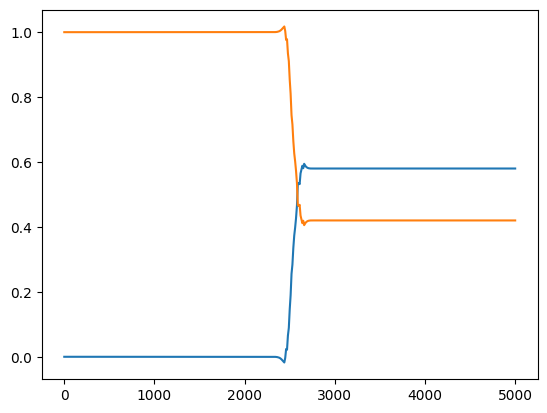

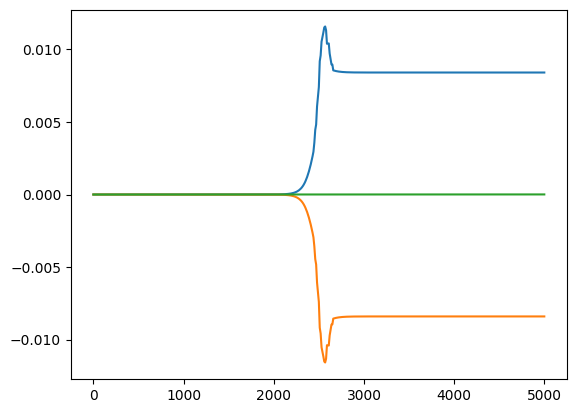

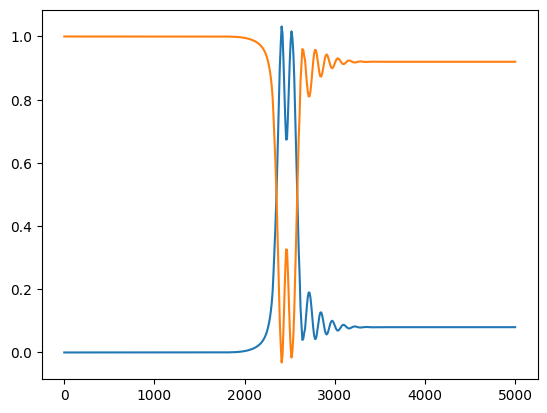

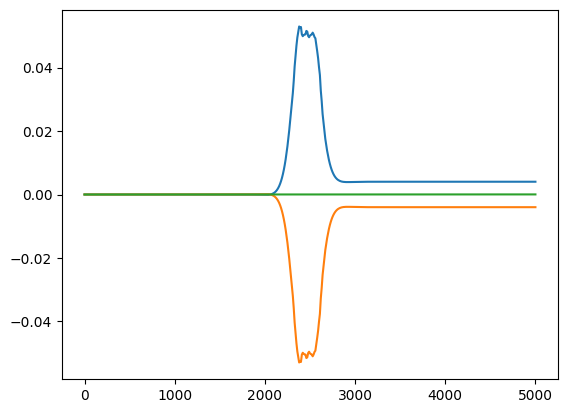

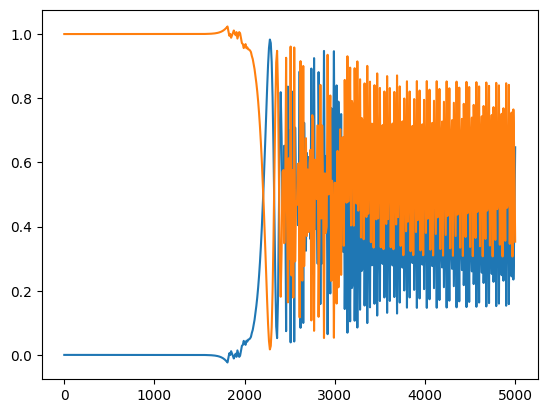

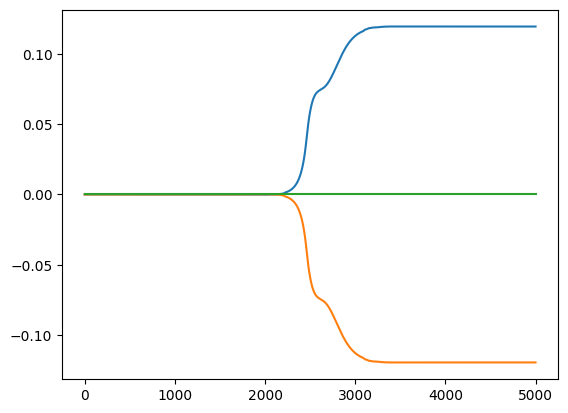

In [3]:
for data in [data_1, data_2, data_3]:
    t = data.data_dict["t"]
    pops = np.real(np.einsum('tii->ti',data.data_dict["dm_db"]))
    ec = np.real(data.data_dict["classical_energy"])
    eq = np.real(data.data_dict["quantum_energy"])
    plt.plot(t, pops)
    plt.show()
    plt.plot(t, ec-ec[0]) 
    plt.plot(t, eq-eq[0])
    plt.plot(t, eq-eq[0]+ec-ec[0])
    plt.show()

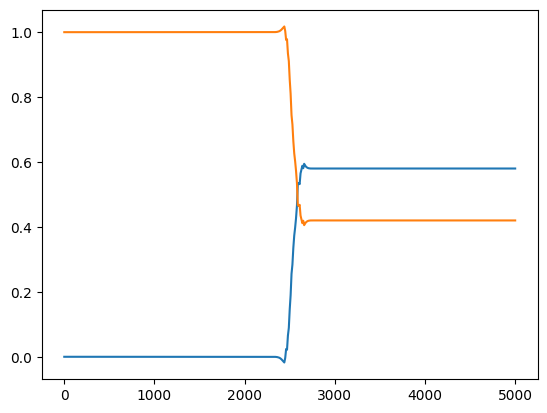

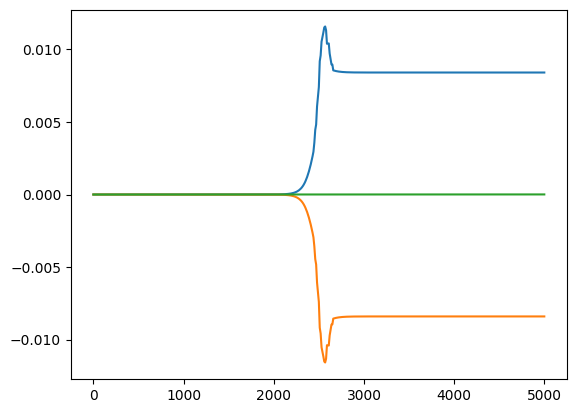

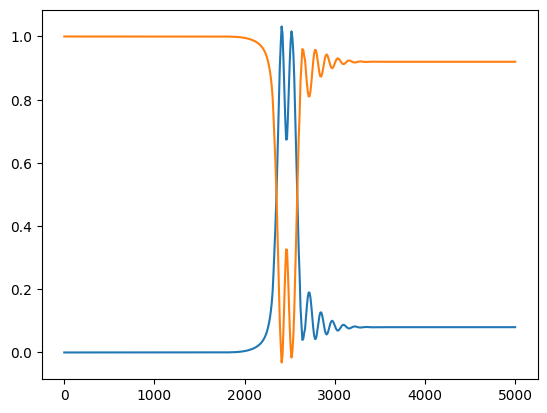

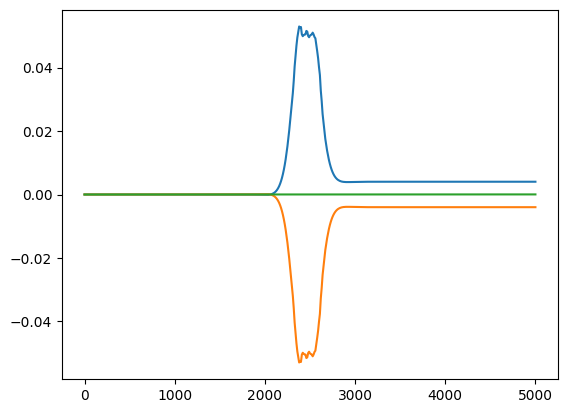

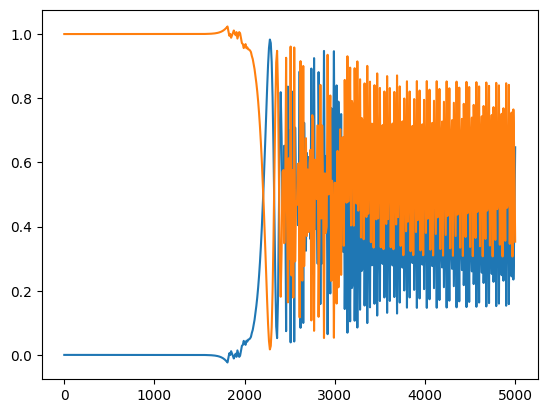

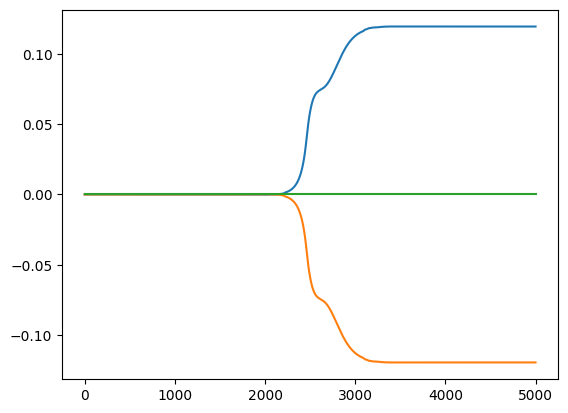

In [4]:
for data in [data_1, data_2, data_3]:
    t = data.data_dict["t"]
    pops = np.real(np.einsum('tii->ti',data.data_dict["dm_db"]))
    ec = np.real(data.data_dict["classical_energy"])
    eq = np.real(data.data_dict["quantum_energy"])
    plt.plot(t, pops)
    plt.show()
    plt.plot(t, ec-ec[0]) 
    plt.plot(t, eq-eq[0])
    plt.plot(t, eq-eq[0]+ec-ec[0])
    plt.show()

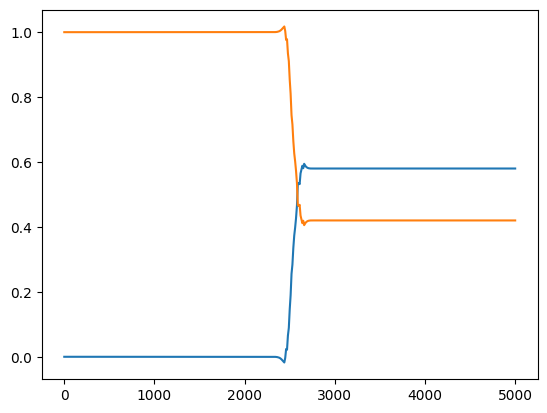

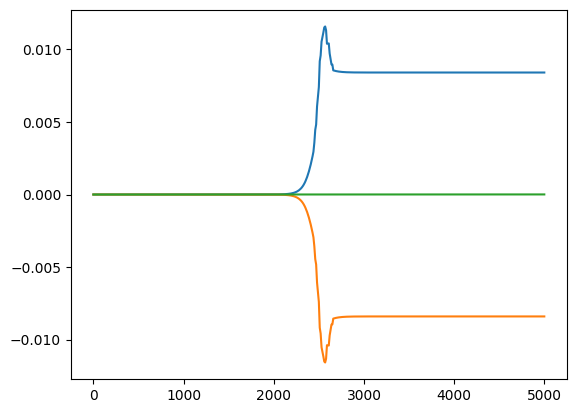

In [5]:
t = data_1.data_dict["t"]
pops = np.real(np.einsum('tii->ti',data_1.data_dict["dm_db"]))
ec = np.real(data_1.data_dict["classical_energy"])
eq = np.real(data_1.data_dict["quantum_energy"])
plt.plot(t, pops)
plt.show()
plt.plot(t, ec-ec[0])
plt.plot(t, eq-eq[0])
plt.plot(t, eq-eq[0]+ec-ec[0])
plt.show()

/home/akrotz/Research/qclab-dev/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/akrotz/Research/qclab-dev/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


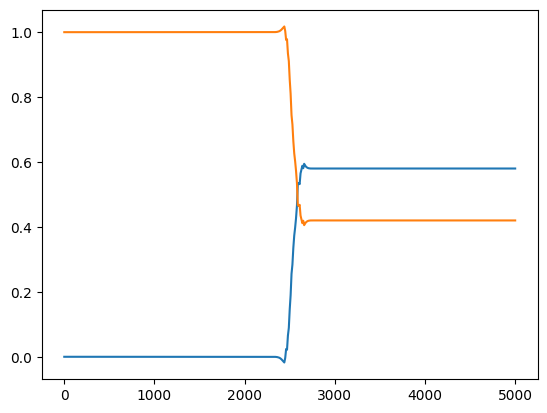

In [6]:
t = data_1.data_dict["t"]
pops = np.einsum('tii->ti',data_1.data_dict["dm_db"])
plt.plot(t, pops)
plt.show()